In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta

from scipy import stats

import requests
from urllib.parse import urlencode

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
customers = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-zjubanova-36/midterm_project/olist_customers_dataset.csv')

In [3]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
orders = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-zjubanova-36/midterm_project/olist_orders_dataset.csv')

In [5]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
order_items = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-zjubanova-36/midterm_project/olist_order_items_dataset.csv')

In [7]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


# 1. Сколько у нас пользователей, которые совершили покупку только один раз?

In [9]:
customers_orders = customers.merge(orders, how='left', on='customer_id')

In [10]:
customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [11]:
customers_orders_1_order = customers_orders.query('order_status == "delivered"') \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'order_status': 'count'}) \
    .query('order_status == 1')

In [12]:
customers_orders_1_order.shape[0] # покупатели, совершившие только 1 покупку

90557

# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? 

Я считаю логичным считать недоставленными заказы со статусами "unavailable" и "canceled"

In [15]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

In [16]:
orders_by_month_not_delivered = orders.query('order_status == "unavailable" or order_status == "canceled"') \
    .groupby([orders.order_purchase_timestamp.dt.year, orders.order_purchase_timestamp.dt.month_name(), 'order_status'], as_index=False) \
    .agg({'order_id': 'count'})

In [17]:
orders_by_month_not_delivered.query('order_status == "unavailable"').mean()
# Среднее количество недоступных заказов в месяц - 29

order_id    29.0
dtype: float64

In [18]:
orders_by_month_not_delivered.query('order_status == "canceled"').mean().round()
# Среднее количество отмененных заказов в месяц - 26

order_id    26.0
dtype: float64

# 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

In [20]:
orders_order_items = orders.merge(order_items, how='left', on='order_id')

In [21]:
orders_order_items['order_purchase_timestamp'] = pd.to_datetime(orders_order_items['order_purchase_timestamp'])

In [22]:
orders_order_items['order_approved_at'] = pd.to_datetime(orders_order_items['order_approved_at'])

In [23]:
orders_order_items['order_delivered_carrier_date'] = pd.to_datetime(orders_order_items['order_delivered_carrier_date'])

In [24]:
orders_order_items['order_delivered_customer_date'] = pd.to_datetime(orders_order_items['order_delivered_customer_date'])

In [25]:
orders_order_items['order_estimated_delivery_date'] = pd.to_datetime(orders_order_items['order_estimated_delivery_date'])

In [26]:
orders_order_items['shipping_limit_date'] = pd.to_datetime(orders_order_items['shipping_limit_date'])

In [27]:
orders_order_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [28]:
orders_order_items['order_approved_at'] = orders_order_items['order_approved_at'].dt.day_name()

In [29]:
orders_order_items_1 = orders_order_items \
    .groupby(['product_id', 'order_approved_at']) \
    .agg({'order_id': 'count'})

In [30]:
orders_order_items_2 = orders_order_items_1.groupby('product_id', as_index=False) \
    .idxmax()

In [31]:
orders_order_items_2

,order_id
0,"(00066f42aeeb9f3007548bb9d3f33c38, Sunday)"
1,"(00088930e925c41fd95ebfe695fd2655, Tuesday)"
2,"(0009406fd7479715e4bef61dd91f2462, Friday)"
3,"(000b8f95fcb9e0096488278317764d19, Friday)"
4,"(000d9be29b5207b54e86aa1b1ac54872, Tuesday)"
...,...
32943,"(fff6177642830a9a94a0f2cba5e476d1, Monday)"
32944,"(fff81cc3158d2725c0655ab9ba0f712c, Monday)"
32945,"(fff9553ac224cec9d15d49f5a263411f, Saturday)"
32946,"(fffdb2d0ec8d6a61f0a0a0db3f25b441, Tuesday)"


In [32]:
order_approved_at_week = []

In [33]:
for i in orders_order_items_2['order_id']:
    order_approved_at_week.append(i)

In [34]:
orders_order_items_final = pd.DataFrame(order_approved_at_week)

In [35]:
orders_order_items_final = orders_order_items_final.rename(columns={0:'product_id', 1:'order_approved_at_weekday'})

In [36]:
orders_order_items_final
# Получаем пары product_id - weekday

,product_id,order_approved_at_weekday
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Friday
3,000b8f95fcb9e0096488278317764d19,Friday
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday
...,...,...
32943,fff6177642830a9a94a0f2cba5e476d1,Monday
32944,fff81cc3158d2725c0655ab9ba0f712c,Monday
32945,fff9553ac224cec9d15d49f5a263411f,Saturday
32946,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday


# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 
Не стоит забывать, что внутри месяца может быть не целое количество недель.
Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. 

In [38]:
customers_orders_items = customers_orders.merge(order_items)

In [39]:
customers_orders_items.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [40]:
customers_orders_items['order_approved_at'] = pd.to_datetime(customers_orders_items['order_approved_at'])

In [41]:
customers_orders_items.order_approved_at = customers_orders_items.order_approved_at.dt.strftime('%Y-%m')

In [42]:
customers_buy_per_month = customers_orders_items \
    .groupby(['customer_unique_id', 'order_approved_at'], as_index=False) \
    .agg({'customer_city': 'count'})
# количество покупок пользователей в месяц

In [43]:
customers_buy_per_month['purchase_month'] = customers_buy_per_month.order_approved_at

In [44]:
customers_buy_per_month['purchase_month'] = pd.to_datetime(customers_buy_per_month['purchase_month']).dt.month

In [45]:
def week_of_month(x):
    if x == 2:
        x = 28
    elif x == 4:
        x = 30
    elif x == 6:
        x = 30
    elif x == 9:
        x = 30
    elif x == 11:
        x = 30
    else:
        x = 31
    return x

In [46]:
customers_buy_per_month

,customer_unique_id,order_approved_at,customer_city,purchase_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,5
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,5
2,0000f46a3911fa3c0805444483337064,2017-03,1,3
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,10
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,11
...,...,...,...,...
97296,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,2,6
97297,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1,12
97298,ffff371b4d645b6ecea244b27531430a,2017-02,1,2
97299,ffff5962728ec6157033ef9805bacc48,2018-05,1,5


In [47]:
customers_buy_per_month['purchase_month'] = customers_buy_per_month['purchase_month'].apply(week_of_month)

In [48]:
customers_buy_per_month['purchase_month'] = round((customers_buy_per_month['purchase_month'] / 7), 0)

In [49]:
customers_buy_per_month['avg_purchase_per_week_by_month'] = customers_buy_per_month['customer_city'] 
/ customers_buy_per_month['purchase_month'] 

0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
97296    4.0
97297    4.0
97298    4.0
97299    4.0
97300    4.0
Name: purchase_month, Length: 97301, dtype: float64

# 5. Используя pandas, проведи когортный анализ пользователей. 
В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

Примем все заказы со статусами processing, shipped и delivered за состоявшиеся, то есть оплаченные и полученные без отмен и потерь

In [52]:
customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [53]:
customers_orders_task5 = customers_orders
#в этой задаче нужно будет менять датафрейм, поэтому нужно создать новый

In [54]:
customers_orders_task5 = customers_orders_task5.dropna()

In [55]:
customers_orders_task5['first_buy'] = customers_orders_task5.groupby('customer_unique_id')['order_approved_at'].transform('min')
#колонка с датой первой покупки для каждого клиента

In [56]:
customers_orders_task5.order_purchase_timestamp = pd.to_datetime(customers_orders_task5.order_purchase_timestamp)
customers_orders_task5.order_approved_at = pd.to_datetime(customers_orders_task5.order_approved_at)
customers_orders_task5.first_buy = pd.to_datetime(customers_orders_task5.first_buy)
#переведем колонки с датами в формат datetime

In [57]:
customers_orders_task5.order_purchase_timestamp = customers_orders_task5.order_purchase_timestamp.dt.strftime('%Y-%m')
customers_orders_task5.order_approved_at = customers_orders_task5.order_approved_at.dt.strftime('%Y-%m')
customers_orders_task5.first_buy = customers_orders_task5.first_buy.dt.strftime('%Y-%m')
#все колонки с датами должны быть в формате месяца,так как для retention rate используется именно разбивка по месяцам

In [58]:
customers_orders_task5 = customers_orders_task5 \
    .query("order_status == ['processing', 'shipped', 'delivered'] & '2017-01' <= first_buy <= '2017-12'") \
    .groupby(['first_buy', 'order_approved_at'], as_index=False) \
    .agg({'customer_unique_id': 'nunique'})
#оставляем только заказы с нужными статусами
#делаем группировку по датам
#считаем количество уникальных пользователей

In [59]:
customers_orders_task5.order_approved_at = pd.to_datetime(customers_orders_task5.order_approved_at).dt.to_period("m")
customers_orders_task5.first_buy = pd.to_datetime(customers_orders_task5.first_buy).dt.to_period("m")
#переводим месяц в номер месяца

In [60]:
import operator
customers_orders_task5['term'] = (customers_orders_task5.order_approved_at - customers_orders_task5.first_buy).apply(operator.attrgetter("n"))
#берем месяц первой покупки за точку отсчета и считаем месяц покупки

In [61]:
customers_orders_task5

,first_buy,order_approved_at,customer_unique_id,term
0,2017-01,2017-01,683,0
1,2017-01,2017-02,3,1
2,2017-01,2017-03,2,2
3,2017-01,2017-04,1,3
4,2017-01,2017-05,3,4
...,...,...,...,...
166,2017-12,2018-04,13,4
167,2017-12,2018-05,11,5
168,2017-12,2018-06,9,6
169,2017-12,2018-07,1,7


In [62]:
customers_orders_task5_pivot = customers_orders_task5.pivot(index='first_buy', columns = 'term', values = 'customer_unique_id')

In [63]:
customers_orders_task5_pivot
#получаем разбивку потребителей на когорты

term,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
first_buy,,,,,,,,,,,,,,,,,,,
2017-01,683.0,3.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,2.0,2.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0
2017-02,1612.0,3.0,4.0,3.0,7.0,2.0,4.0,3.0,1.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,3.0,NaN
2017-03,2511.0,11.0,9.0,9.0,9.0,4.0,4.0,8.0,7.0,3.0,9.0,3.0,5.0,3.0,4.0,6.0,2.0,3.0,NaN
2017-04,2232.0,14.0,5.0,4.0,5.0,6.0,8.0,6.0,8.0,4.0,5.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,NaN
2017-05,3452.0,18.0,16.0,10.0,10.0,11.0,14.0,5.0,9.0,9.0,10.0,12.0,6.0,2.0,6.0,7.0,NaN,NaN,NaN
2017-06,3044.0,15.0,12.0,13.0,9.0,11.0,11.0,7.0,4.0,6.0,9.0,12.0,5.0,5.0,7.0,NaN,NaN,NaN,NaN
2017-07,3709.0,20.0,12.0,7.0,13.0,7.0,12.0,4.0,7.0,9.0,8.0,11.0,5.0,9.0,NaN,NaN,NaN,NaN,NaN
2017-08,4081.0,28.0,15.0,11.0,15.0,21.0,11.0,11.0,5.0,7.0,10.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4024.0,27.0,20.0,13.0,17.0,11.0,9.0,9.0,12.0,7.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
#выявляем когорту с самым высоким retention rate на третий месяц 
round(customers_orders_task5_pivot.div(customers_orders_task5_pivot.iloc[:,0], axis = 0).mul(100), 2)[2].idxmax()

Period('2017-09', 'M')

# 6. Часто для качественного анализа аудитории используют подходы, основанные на сегментации. 
Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. 
В кластеризации можешь выбрать следующие метрики: 

R - время от последней покупки пользователя до текущей даты, 

F - суммарное количество покупок у пользователя за всё время, 


M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. 


Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. 


Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик 
recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. 

In [66]:
#в этом задании нам нужен будет общий датафрейм, он уже был создан ранее 
customers_orders_items.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [103]:
customers_orders_items.shape

(110197, 5)

In [67]:
#отберем все завершенные заказы, то есть имеющие статус delivered и оставим только нужные колонки
customers_orders_items = customers_orders_items.query('order_status == "delivered"')
customers_orders_items = customers_orders_items[['customer_unique_id', 'price', 'order_purchase_timestamp', 'order_id', 'order_status']]

In [68]:
customers_orders_items.order_purchase_timestamp = pd.to_datetime(customers_orders_items.order_purchase_timestamp)

In [69]:
#узнаем количество дней, прошедших с даты последней покупки до сегодня (+1 день)
last_day = max(customers_orders_items.order_purchase_timestamp) + timedelta(days=1)

In [70]:
#приступим к подсчету метрики
#начнем с recency - разница во времени между последней датой покупки и сегодняшним днем
recency = customers_orders_items \
        .groupby('customer_unique_id') \
        .agg({'order_purchase_timestamp': lambda x: (last_day - x.max()).days}) \
        .reset_index() \
        .rename(columns={'order_purchase_timestamp': 'recency'})

In [71]:
#frequency - число заказов, сделанных каждым пользователем
frequency = customers_orders_items.groupby('customer_unique_id', as_index=False) \
                       .agg({'order_purchase_timestamp': 'count'}) \
                       .rename(columns={'order_purchase_timestamp': 'frequency'})

In [72]:
#monetary - общая сумма денег, потраченная каждым пользователем
monetary = customers_orders_items.groupby('customer_unique_id', as_index=False) \
                      .agg({'price': 'sum'}) \
                      .rename(columns={'price': 'monetary'})

In [73]:
#объединяем три метрики в общий датафрейм, тем самым получаем RFM
rfm = recency.merge(frequency, on='customer_unique_id').merge(monetary) \
             .rename(columns={'order_purchase_timestamp_x': 'recency', 'order_purchase_timestamp_y': 'frequency'})
rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90
2,0000f46a3911fa3c0805444483337064,537,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00


Проанализируем каждый из трех элементов RFM, начнем с R - recency 

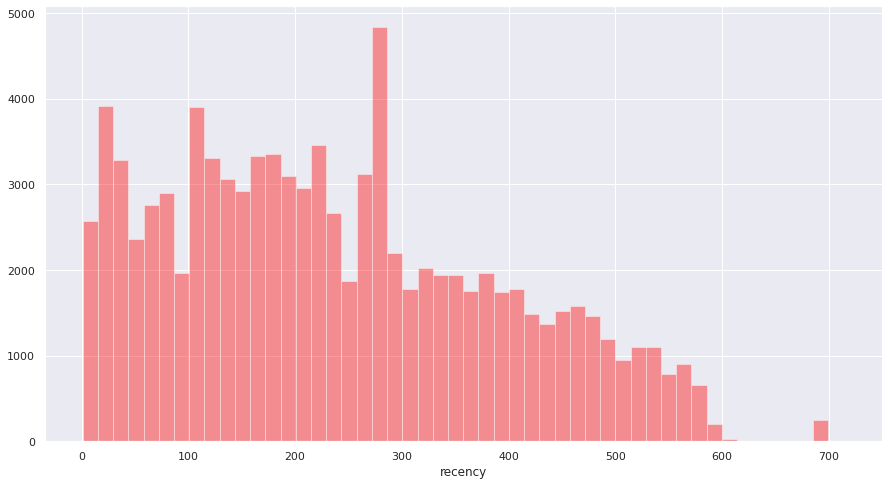

In [75]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.distplot(rfm.recency, kde=False, color='red')

Кажется справедливым сделать разбивку на три примерно равных сегмента внутри Recency

In [77]:
rfm.recency.quantile(q=0.66)

286.0

Последний (3) сегмент будет находиться справа от отметки 286 по оси Х, что показал нам 0.66 квантиль

In [79]:
rfm.recency.quantile(q=0.33)

147.0

На графике можно заметить резкий перепад чуть раньше отметки 100,что немного меньше 0.33 квантиля, а значит подходит для границы первого сегмента

Для удобства можно взять 90 дней, что равно 3 месяцам, поэтому будет легче восприниматься

In [81]:
def R(recency):
    if recency > 286:
        return 3
    elif recency <= 90:
        return 1
    else:
        return 2

rfm['R'] = rfm.recency.apply(R)

Перейдем к Frequency

In [83]:
rfm.frequency.describe()

count    93358.000000
mean         1.180370
std          0.620857
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         24.000000
Name: frequency, dtype: float64

Судя по квантилям, показанным методом describe, как минимум 75% покупателей совершили только одну покупку

In [85]:
#найдем более точное число тех, кто совершил только одну покупку
#получаем 88%
round(rfm.frequency.value_counts().to_list()[0] / sum(rfm.frequency.value_counts().to_list()), 2)

0.88

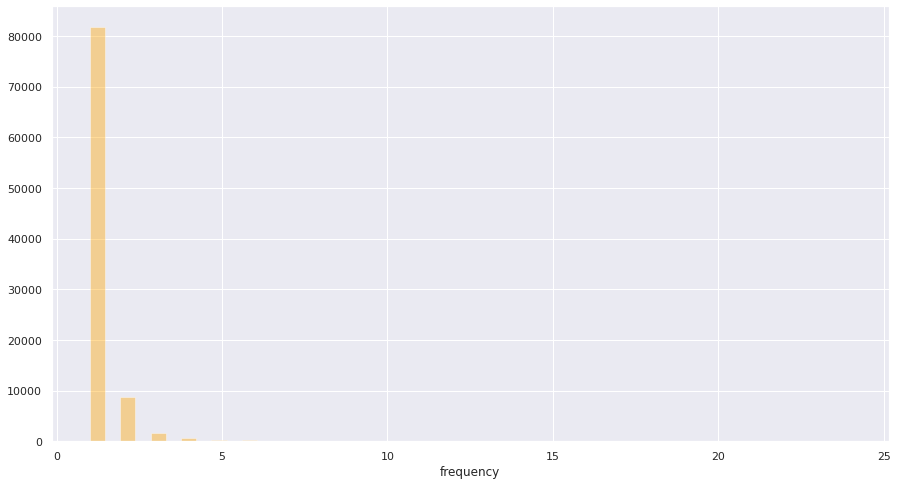

In [86]:
#на графике также видно неравномерность (ненормальность) распределения
sns.set(rc={'figure.figsize':(15, 8)})
sns.distplot(rfm.frequency, kde=False, color='orange')

Разобьем Frequency на три группы:

группа 1 - те, кто совершил только 1 покупку

группа 2 - те, кто совершил 2 покупки

группа 3 - те, кто совершил 3+ покупки

In [88]:
def F(frequency):
    if frequency == 1:
        return 1
    elif frequency == 2:
        return 2
    else:
        return 3

rfm['F'] = rfm.frequency.apply(F)

Разберем последний сегмент - Monetary

In [90]:
rfm.monetary.describe()

count    93358.000000
mean       141.621480
std        215.694014
min          0.850000
25%         47.650000
50%         89.730000
75%        154.737500
max      13440.000000
Name: monetary, dtype: float64

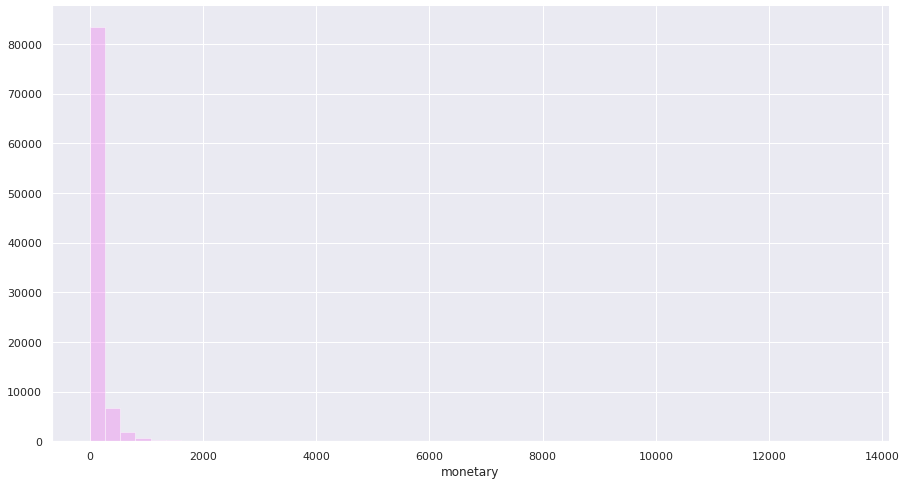

In [91]:
sns.distplot(rfm.monetary, kde=False, color='violet')
sns.despine()

Как и в предыдущих двух пунктах, сделаем разбивку на три группы

группа 1 - сумма потраченных денег до 150 единиц 

группа 2 - 150-1000 ед.

группа 3 - более 1000 ед.

Такое разделение обусловлено квантилями и графиком

In [93]:
def M(monetary):
    if monetary <= 150:
        return 1
    elif monetary > 1000:
        return 3
    else:
        return 2

rfm['M'] = rfm.monetary.apply(M)

In [94]:
rfm

,customer_unique_id,recency,frequency,monetary,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,2,1,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,2,1,1
2,0000f46a3911fa3c0805444483337064,537,1,69.00,3,1,1
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,3,1,1
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,3,1,2
...,...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,447,2,1570.00,3,2,3
93354,fffea47cd6d3cc0a88bd621562a9d061,262,1,64.89,2,1,1
93355,ffff371b4d645b6ecea244b27531430a,568,1,89.90,3,1,1
93356,ffff5962728ec6157033ef9805bacc48,119,1,115.00,2,1,1


In [95]:
#для каждого покупателя покажем, к какому кластеру он относится
rfm['RFM'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

In [96]:
#выведем кластеризацию, для этого в каждом кластере возьмем среднее каждой метрики
rfm_clusters = rfm \
        .groupby('RFM') \
        .agg({'recency': 'mean', 'frequency': 'mean', 'monetary': 'mean'}) \
        .round(1)

In [97]:
#всего получилось 27 кластеров
rfm_clusters.shape[0]

27

In [98]:
#для каждого кластера выведем количество входящих в него покупателей
rfm_cust_quantity = rfm \
    .groupby('RFM', as_index=False) \
    .agg({'customer_unique_id': 'count'}) \
    .rename(columns={'customer_unique_id': 'customers_quantity'})

In [99]:
rfm_clusters = rfm_clusters.merge(rfm_cust_quantity, on='RFM')

In [100]:
rfm_clusters.head()

,RFM,recency,frequency,monetary,customers_quantity
0,111,44.5,1.0,69.2,12650
1,112,45.5,1.0,294.3,3389
2,113,45.8,1.0,1686.0,152
3,121,45.1,2.0,86.4,950
4,122,46.1,2.0,288.4,734


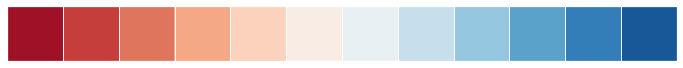

In [101]:
sns.palplot(sns.color_palette("RdBu", 12))

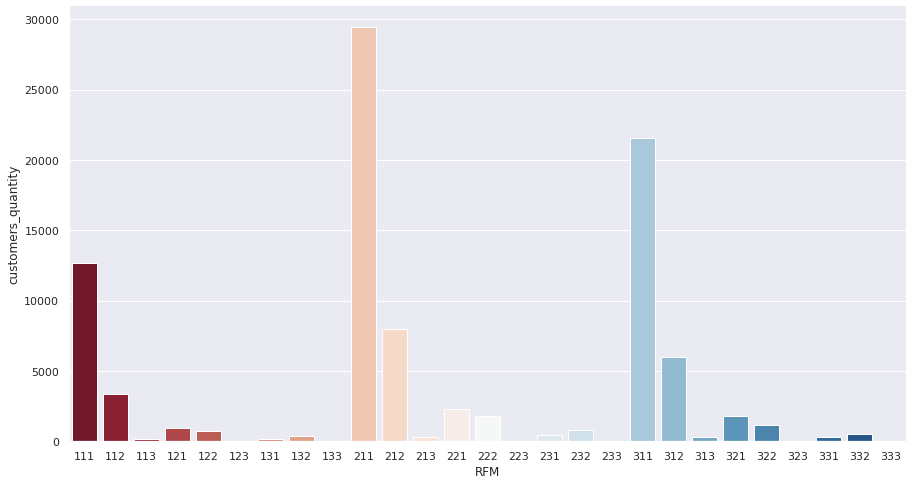

In [102]:
#покажем распределение потребителей по кластерам
sns.barplot(data=rfm_clusters, x='RFM', y='customers_quantity', palette="RdBu")
sns.despine()